In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
vmdd_test_root = "/home/iain/Desktop/dataset/VMD/test"
vmdd_train_root = "/home/iain/Desktop/dataset/VMD/train"
unlabeled_root = "/home/iain/Desktop/dataset/VMD/unlabeled"
Pexels_root = "/home/iain/Desktop/dataset/VMD/Pexels"

# Get the list of all images in the directory tree
vmdd_test_images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(vmdd_test_root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg', '.jpeg']]
vmdd_test_gt = [os.path.join(dp, f) for dp, dn, filenames in os.walk(vmdd_test_root) for f in filenames if os.path.splitext(f)[1].lower() in ['.png']]

vmdd_train_images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(vmdd_train_root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg', '.jpeg']]
vmdd_train_gt = [os.path.join(dp, f) for dp, dn, filenames in os.walk(vmdd_train_root) for f in filenames if os.path.splitext(f)[1].lower() in ['.png']]

unlabeled_images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(unlabeled_root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg', '.jpeg']]
unlabeled_gt = [os.path.join(dp, f) for dp, dn, filenames in os.walk(unlabeled_root) for f in filenames if os.path.splitext(f)[1].lower() in ['.png']]

pexels_images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(Pexels_root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg', '.jpeg']]
pexels_gt = [os.path.join(dp, f) for dp, dn, filenames in os.walk(Pexels_root) for f in filenames if os.path.splitext(f)[1].lower() in ['.png']]

In [3]:
# Get the total number of frames for each dataset
vmdd_test_frames = len(vmdd_test_images)
vmdd_train_frames = len(vmdd_train_images)
unlabeled_frames = len(unlabeled_images)
pexels_frames = len(pexels_images)

print("VMDD Test Frames: ", vmdd_test_frames)
print("VMDD Train Frames: ", vmdd_train_frames)
print("Unlabeled Frames: ", unlabeled_frames)
print("Pexels Frames: ", pexels_frames)

VMDD Test Frames:  7152
VMDD Train Frames:  7836
Unlabeled Frames:  228541
Pexels Frames:  984


In [4]:
# Get the number of videos in each dataset.
vmdd_test_vids = [os.path.join(vmdd_test_root, d) for d in os.listdir(vmdd_test_root) if os.path.isdir(os.path.join(vmdd_test_root, d))]
vmdd_train_vids = [os.path.join(vmdd_train_root, d) for d in os.listdir(vmdd_train_root) if os.path.isdir(os.path.join(vmdd_train_root, d))]
unlabeled_vids = [os.path.join(unlabeled_root, d) for d in os.listdir(unlabeled_root) if os.path.isdir(os.path.join(unlabeled_root, d))]
pexels_vids = [os.path.join(Pexels_root, d) for d in os.listdir(Pexels_root) if os.path.isdir(os.path.join(Pexels_root, d))]

print("VMDD Test Videos: ", len(vmdd_test_vids))
print("VMDD Train Videos: ", len(vmdd_train_vids))
print("Unlabeled Videos: ", len(unlabeled_vids))
print("Pexels Videos: ", len(pexels_vids))

VMDD Test Videos:  125
VMDD Train Videos:  143
Unlabeled Videos:  525
Pexels Videos:  8


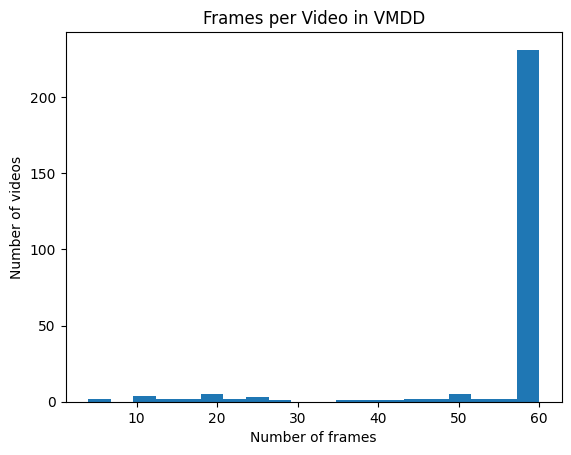

In [19]:
# Create a histogram of the number of frames in each video. The number of frames in each video is the number of images in the video directory.
vmdd_test_vids_frames = [len([os.path.join(dp, f) for dp, dn, filenames in os.walk(d) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg', '.jpeg']]) for d in vmdd_test_vids] + [len([os.path.join(dp, f) for dp, dn, filenames in os.walk(d) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg', '.jpeg']]) for d in vmdd_train_vids]
unlabeled_vids_frames = [len([os.path.join(dp, f) for dp, dn, filenames in os.walk(d) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg', '.jpeg']]) for d in unlabeled_vids]

# Limit the number of frames to 1000
vmdd_test_vids_frames = [min(f, 1000) for f in vmdd_test_vids_frames]
unlabeled_vids_frames = [min(f, 1000) for f in unlabeled_vids_frames]

# Plot the histogram
plt.hist(vmdd_test_vids_frames, bins=20, alpha=1.0)
#plt.hist(unlabeled_vids_frames, bins=20, alpha=1.0, label='Unlabeled')
plt.title('Frames per Video in VMDD')
plt.xlabel('Number of frames')
plt.ylabel('Number of videos')
plt.show()


In [21]:
# Get the mean and standard deviation of the number of each video in each dataset
vmdd_test_mean = np.mean(vmdd_test_vids_frames)
vmdd_test_std = np.std(vmdd_test_vids_frames)
unlabeled_mean = np.mean(unlabeled_vids_frames)
unlabeled_std = np.std(unlabeled_vids_frames)
print("VMDD Test Mean: ", vmdd_test_mean)
print("VMDD Test Std: ", vmdd_test_std)
print("Unlabeled Mean: ", unlabeled_mean)
print("Unlabeled Std: ", unlabeled_std)


VMDD Test Mean:  55.92537313432836
VMDD Test Std:  11.934289532762959
Unlabeled Mean:  417.24380952380955
Unlabeled Std:  218.6173033380955


In [22]:
# Get the total number of frames in each dataset
vmdd_test_total_frames = sum(vmdd_test_vids_frames)
unlabeled_total_frames = sum(unlabeled_vids_frames)
print("VMDD Test Total Frames: ", vmdd_test_total_frames)
print("Unlabeled Total Frames: ", unlabeled_total_frames)


VMDD Test Total Frames:  14988
Unlabeled Total Frames:  219053
